# Project-3 Telecom_Complaints

DESCRIPTION
Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.
Data Dictionary
•	Ticket #: Ticket number assigned to each complaint
•	Customer Complaint: Description of complaint
•	Date: Date of complaint
•	Time: Time of complaint
•	Received Via: Mode of communication of the complaint
•	City: Customer city
•	State: Customer state
•	Zipcode: Customer zip
•	Status: Status of complaint
•	Filing on behalf of someone
Analysis Task
To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.
- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.
•	Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
•	Which state has the maximum complaints
•	Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
The analysis results to be provided with insights wherever applicable.



In [1]:
#importing required libraries----------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing the data-----------------
data = pd.read_csv('Comcast_telecom_complaints_data.csv')
data

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [2]:
# To understand the basic information of the dataset we uses "info" function

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [3]:
# Checking the null values in the data-------------

data.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

There is zero null values in the dataset

In [4]:
# Now we can drop the columns which are not required ---------------------------------

data.drop(['Ticket #','Date','Zip code'],axis=1)

,Customer Complaint,Date_month_year,Time,Received Via,City,State,Status,Filing on Behalf of Someone
0,Comcast Cable Internet Speeds,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,Closed,No
1,Payment disappear - service got disconnected,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,Closed,No
2,Speed and Service,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,Closed,Yes
3,Comcast Imposed a New Usage Cap of 300GB that ...,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,Open,Yes
4,Comcast not working and no service to boot,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,Solved,No
...,...,...,...,...,...,...,...,...
2219,Service Availability,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,Closed,No
2220,Comcast Monthly Billing for Returned Modem,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,Solved,No
2221,complaint about comcast,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,Solved,No
2222,Extremely unsatisfied Comcast customer,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,Solved,No


In [5]:
#Converting datatype of 'Date_month_year' from object to datetime datatype------------------
data['Date_month_year'] = pd.to_datetime(data['Date_month_year'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   object        
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

Dtype of 'Date_month_year' is changed to datetime Dtype

In [6]:
#Importing claendar----the calendar class that allows the calculations for various task based on date, month, and year----

import calendar
data['Date'] =data.Date_month_year.dt.day
data['Month'] = (data.Date_month_year.dt.month).apply(lambda x: calendar.month_abbr[x])
data.head(6)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr
1,223441,Payment disappear - service got disconnected,4,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug
2,242732,Speed and Service,18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul
4,307175,Comcast not working and no service to boot,26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May
5,338519,ISP Charging for arbitrary data limits with ov...,6,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,Dec


# Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [7]:
# Chart showing the trend of the number of complaints at monthly and daily granularity levels.

number_of_complaints_monthly=data['Month'].value_counts()
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
number_of_complaints_monthly=number_of_complaints_monthly .reindex(new_order, axis=0).reset_index().rename(columns={'index':'Month','Month':'Complaint #'})

number_of_complaints_monthly


,Month,Complaint #
0,Jan,55
1,Feb,59
2,Mar,45
3,Apr,375
4,May,317
5,Jun,1046
6,Jul,49
7,Aug,67
8,Sep,55
9,Oct,53


The no.of monthly compliants are high during the month of june.

In [8]:
NOC_daily =data.groupby(['Month','Date']).count()['City'].to_frame().reset_index().rename(columns={
    'City':'Complaint #'})
NOC_daily[NOC_daily.Month=='Jan'] 

,Month,Date,Complaint #
30,Jan,4,18
31,Jan,5,12
32,Jan,6,25


The highest no.of complaints reported on a daily basis is during the month of january 4th,5th and 6th.

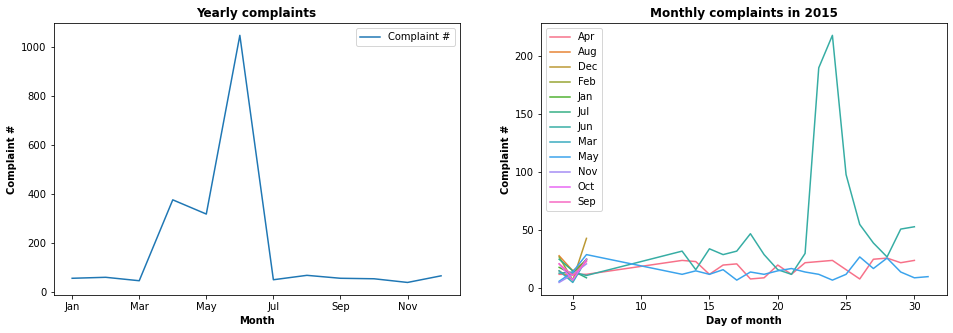

In [9]:
#plotting the monthly and daily no.of complaints------------------
fig,ax = plt.subplots(1,2,figsize=(16,5))

monthly = number_of_complaints_monthly.plot.line(x='Month',y='Complaint #',ax=ax[0])
monthly.set_xlabel('Month',weight='bold')
monthly.set_ylabel('Complaint #',weight='bold')
monthly.set_title('Yearly complaints',weight='bold')

daily = sns.lineplot(x=NOC_daily.Date,y=NOC_daily['Complaint #'],hue=NOC_daily.Month,ax=ax[1])
daily.set_xlabel('Day of month',weight='bold')
daily.set_ylabel('Complaint #',weight='bold')
daily.legend(loc='upper left')
daily.set_title('Monthly complaints in 2015',weight='bold')
plt.show()

In the first figure it is observes that during the period of March to June the no.of complaints are at peak.In the second figure it is observed that the month of june the no.of complaints is high and these complaints are reported at the end of month.

# Provide a table with the frequency of complaint types.

In [10]:
# To find out the complaint type we use counts-------------------
Complaint_Type=data['Customer Complaint'].value_counts().to_frame().reset_index().rename(columns={'index':'Complaint Type','Customer Complaint':'Frequency'})
Complaint_Type

,Complaint Type,Frequency
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Billing,11
...,...,...
1836,Improper Billing and non resolution of issues,1
1837,Deceptive trade,1
1838,intermittent internet,1
1839,Internet Speed on Wireless Connection,1


Comcast complaint has the highest frequency count

# Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [12]:
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

Complaint_Type[(Complaint_Type.Frequency*100)/Complaint_Type.Frequency.sum()>= .5]
Complaint_Type.head(10)

,Complaint Type,Frequency
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Billing,11
5,Data Caps,11
6,Comcast Data Caps,11
7,Unfair Billing Practices,9
8,Comcast data cap,8
9,Comcast internet,8


From above top complaint type counts it is clear that maximum complaints are coming for internet issue

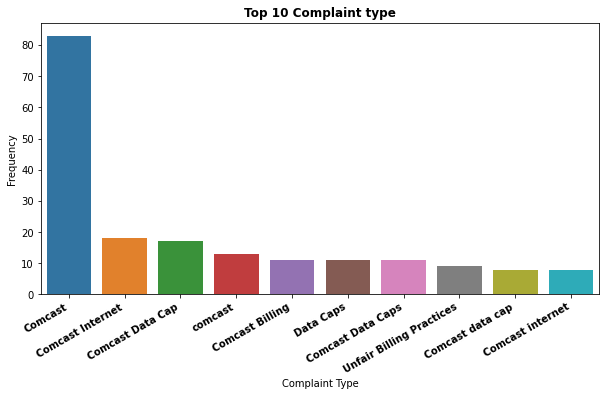

In [13]:
# Plotting the top 10 complaint types 

plt.figure(figsize=(10,5))
complaint = sns.barplot(x=Complaint_Type['Complaint Type'].head(10),y=Complaint_Type.Frequency.head(10))
complaint.set_title('Top 10 Complaint type',weight='bold')
complaint.set_xticklabels(complaint.get_xticklabels(), rotation=30, ha="right",size=10,weight='bold')

plt.show()

# Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [14]:
#Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

data['Status'].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [26]:
# Inorder to create a new categorical variable with value as Open and Closed we use conditional statement 

data['Final_Status']=0
for i in range (len(data['Status'])):
    if (data['Status'][i]=='Closed')|(data['Status'][i]=='Solved'):
        data['Final_Status'][i] = 'Closed'
    else:
        data['Final_Status'][i] = 'Open'
data.sample(6)


C:\Users\diyav\AppData\Local\Temp/ipykernel_14920/364238976.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Final_Status'][i] = 'Closed'
C:\Users\diyav\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Final_Status
568,298254,Promissed a package and then denied,19,2015-05-19,9:25:24 PM,Internet,Denver,Colorado,80203,Solved,No,May,Closed
1475,224605,"Comcast - Fraudulent Billing Practices, Unwill...",4,2015-08-04,3:50:45 PM,Customer Care Call,Olympia,Washington,98501,Closed,No,Aug,Closed
935,361001,keep getting charged for modem rental and I bo...,24,2015-06-24,9:22:46 AM,Internet,Indianapolis,Indiana,46278,Solved,No,Jun,Closed
321,223515,"Issues with Comcast regarding service, billing...",4,2015-08-04,10:48:14 AM,Customer Care Call,Cambridge,Massachusetts,2138,Closed,No,Aug,Closed
1302,358736,Comcast has raised my bill twice without warning,23,2015-06-23,2:45:47 PM,Customer Care Call,Minneapolis,Minnesota,55419,Solved,No,Jun,Closed
963,276082,COMCAST REFUSES TO SERVE MY ADDRESS,5,2015-06-05,1:29:58 PM,Internet,Jacksonville,Florida,32234,Solved,No,Jun,Closed


New column Final status is formed where Open & Pending is categorized as Open and Closed & Solved is categorized as Closed.

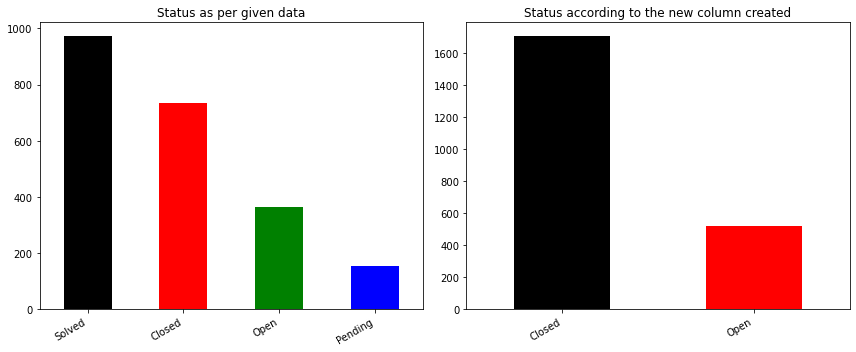

In [16]:
#plotting the graph for the above----------------
fig,ax = plt.subplots(1,2,figsize=(12,5))

prv_stat = data.Status.value_counts().plot(kind='bar',ax=ax[0],color=['black', 'red', 'green', 'blue'])
prv_stat.set_title('Status as per given data')
prv_stat.set_xticklabels(prv_stat.get_xticklabels(), rotation=30, ha="right")

cur_stat = data.Final_Status.value_counts().plot(kind='bar',ax=ax[1],color=['black', 'red', 'green', 'blue'])
cur_stat.set_title('Status according to the new column created')
cur_stat.set_xticklabels(cur_stat.get_xticklabels(),rotation=30,ha='right')

plt.tight_layout()

# Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3

In [17]:
#To find state wise status of complaints in a stacked bar chart.First we are applying groupby function and then use crosstab function to get more insight


data.groupby(['State','Final_Status']).count()['City'].to_frame().rename(columns={'City':'Counts'})

Counts
State         Final_Status        
Alabama       Closed            17
              Open               9
Arizona       Closed            14
              Open               6
Arkansas      Closed             6
...                            ...
Virginia      Open              11
Washington    Closed            75
              Open              23
West Virginia Closed             8
              Open               3

[77 rows x 1 columns]

In [18]:
State_status = pd.crosstab(data.State,data.Final_Status)
State_status.head(20)

Final_Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


<Figure size 14400x3600 with 0 Axes>

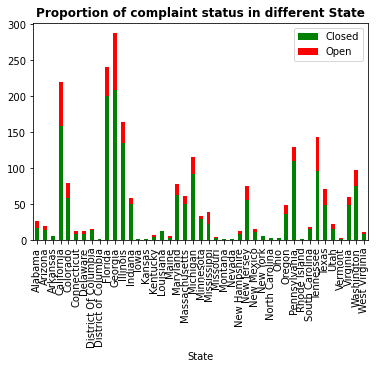

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(200,50))

State_status.plot(kind='bar',stacked=True,color=['green','red'])
plt.title('Proportion of complaint status in different State',weight='bold')
plt.legend(loc='best')

plt.show()
plt.tight_layout()

States Georgia,Florida and california are three states from where maximum complaints were received.The highest unresolved and resolved complaints are both in Georgia.

# Which state has the maximum complaints

In [20]:
#Which state has the maximum complaints

data.State.value_counts().head(1)

Georgia    288
Name: State, dtype: int64

Georgia has the highest complaints

Text(0.5, 1.0, 'States with respective complaints number')

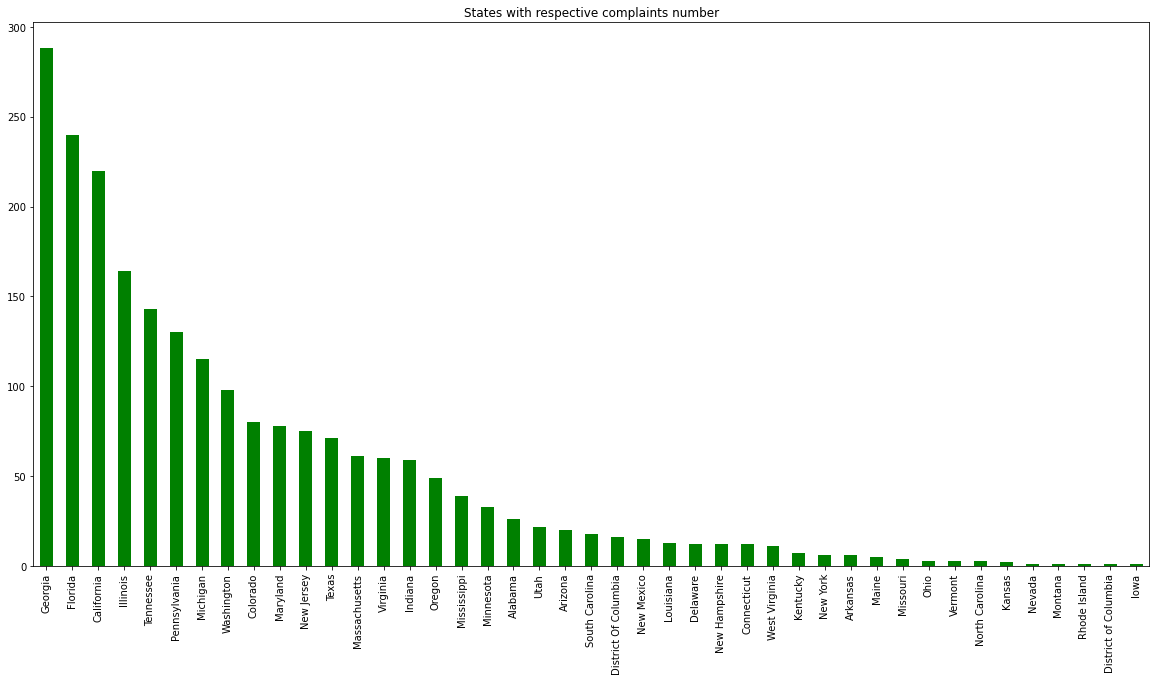

In [21]:
plt.figure(figsize=(20,10))
data.State.value_counts().plot(kind='bar',color=['green'])
plt.title('States with respective complaints number')

States Georgia,Florida and california are three states from where maximum complaints were received

# Which state has the highest percentage of unresolved complaints

In [22]:
# To find State which has the highest percentage of unresolved complaints we use groupby function


State_com =data.groupby(['State','Final_Status']).count()['City'].reset_index().rename(columns={'City':'Counts'})
State_com.head()


,State,Final_Status,Counts
0,Alabama,Closed,17
1,Alabama,Open,9
2,Arizona,Closed,14
3,Arizona,Open,6
4,Arkansas,Closed,6


In [31]:
State_status = pd.crosstab(data.State,data.Final_Status)
State_status.head(20)

Final_Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


In [37]:
State_status['unresolved complaint percent']=(State_status['Open']/State_status['Closed']*100)
State_status.head(20)

Final_Status,Closed,Open,unresolved complaint percent
State,,,
Alabama,17,9,52.941176
Arizona,14,6,42.857143
Arkansas,6,0,0.000000
California,159,61,38.364780
Colorado,58,22,37.931034
Connecticut,9,3,33.333333
Delaware,8,4,50.000000
District Of Columbia,14,2,14.285714
District of Columbia,1,0,0.000000


State Kansas havis 1.0 unresolved complaint out of 1.0 received complaint thus unresolved percentage complaint is 100%

# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [24]:
#To find the percentage of complaints resolved till date, which were received through the Internet and customer care calls.we use groupby function


Solved_Complaints =data.groupby(['Received Via','Final_Status']).count()['City'].reset_index().rename(columns=
                                                                                                            {'City':'Counts'})
Solved_Complaints.head()

,Received Via,Final_Status,Counts
0,Customer Care Call,Closed,864
1,Customer Care Call,Open,255
2,Internet,Closed,843
3,Internet,Open,262


In [25]:
solved_complaint_per = np.around((Solved_Complaints.Counts[(Solved_Complaints.Final_Status=='Closed')&
                                           ((Solved_Complaints['Received Via']=='Internet')
                                            |(Solved_Complaints['Received Via']=='Customer Care Call'))
                                          ].sum()*100/Solved_Complaints.Counts.sum()),decimals=2)
print('Solved percentage till date = {} %'.format(solved_complaint_per))

Solved percentage till date = 76.75 %


Conclusion

As per the above analysis we observe that in the 2nd half of the June month Comcast received high amount of complaints in which most of the complaints are releted to internet service issue and the highest amount of complaints are received from the state Georgia. The highest unresolved complaints are reletaed from the state Georgia and the total amount of resolved complaints are 76.75%.